In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

1.First import the dataset

In [2]:
df = pd.read_csv('Restaurant_Reviews.csv')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [5]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Liked', ylabel='count'>

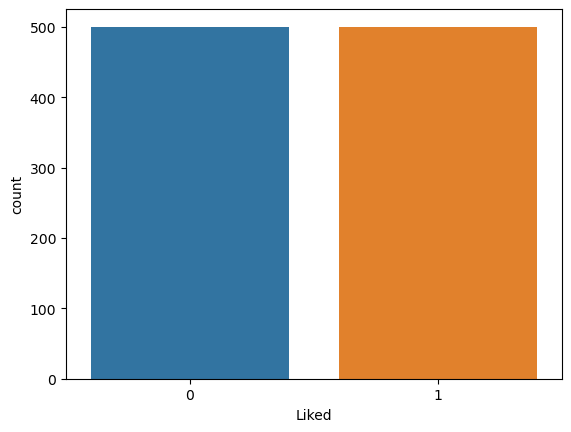

In [6]:
sns.countplot(df['Liked'])

2.Data Preprocessing

In [7]:
x = df['Review'].values
y = df['Liked'].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state = 0,test_size=0.2)

In [9]:
x_train.shape

(800,)

In [10]:
y_train.shape

(800,)

In [11]:
x_test.shape

(200,)

In [12]:
y_test.shape

(200,)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

x_train_cv =v.fit_transform(x_train)

In [14]:
x_test_cv = v.transform(x_test)

3.Training the model

In [15]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(x_train_cv,y_train)

RandomForestClassifier()

In [16]:
y_pred= classifier.predict(x_test_cv)
print(y_pred)

[0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0
 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0]


In [17]:
accuracy_score(y_test,y_pred)

0.785

In [18]:
print('Traning Accuracy: ',
     metrics.accuracy_score(y_train,classifier.predict(x_train_cv))*100)

Traning Accuracy:  100.0


In [19]:
print('Validation Accuracy:',
     metrics.accuracy_score(y_test,classifier.predict(x_test_cv))*100)

Validation Accuracy: 78.5


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[82, 15],
       [28, 75]], dtype=int64)

4.Using Hyperparameter Tuning to improve the model accuracy

In [21]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'bootstrap':[True,False]
}

rf = RandomForestClassifier()

grid_search  = GridSearchCV(estimator=rf, param_grid=param_grid,scoring='accuracy',cv=5)

grid_search.fit(x_train_cv,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [22]:
grid_search.score(x_test_cv,y_test)

0.805

In [23]:
 grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 300}

In [24]:
grid_search.best_score_

0.80625

In [25]:
from sklearn.ensemble import RandomForestClassifier

classifier99 = RandomForestClassifier(bootstrap=False,max_depth = None,min_samples_split=2,n_estimators=200)
classifier99.fit(x_train_cv,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=200)

In [26]:
y_pred99= classifier99.predict(x_test_cv)
print(y_pred99)

[0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0
 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0]


In [27]:
accuracy_score(y_test,y_pred99)

0.8

In [28]:
print('Traning Accuracy: ',
     metrics.accuracy_score(y_train,classifier99.predict(x_train_cv))*100)

Traning Accuracy:  100.0


In [29]:
print('Validation Accuracy:',
     metrics.accuracy_score(y_test,classifier99.predict(x_test_cv))*100)

Validation Accuracy: 80.0


In [30]:
review = {
    "The food was very yummy",
    "The food was not tasty",
    "The food was very good",
    "The was very expensive"
}

review_count = v.transform(review)
classifier99.predict(review_count)

array([1, 1, 0, 0], dtype=int64)

In [31]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_cv,y_train)

MultinomialNB()

In [32]:
y_pred1 = model.predict(x_test_cv)
print(y_pred1)

[0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1]


In [33]:
cm = confusion_matrix(y_test,y_pred1)
cm

array([[81, 16],
       [21, 82]], dtype=int64)

In [34]:
accuracy_score(y_test,y_pred1)

0.815

In [35]:
print('Traning Accuracy: ',
     metrics.accuracy_score(y_train,model.predict(x_train_cv))*100)

Traning Accuracy:  95.875


In [36]:
print('Validation Accuracy:',
     metrics.accuracy_score(y_test,model.predict(x_test_cv))*100)

Validation Accuracy: 81.5


In [37]:
params = {
    	'alpha': [0.01,0.1,0.5,1.0,10.0],
        'fit_prior': [True,False],
        
}

In [38]:
nb = MultinomialNB()

grid_search  = GridSearchCV(estimator=nb, param_grid=params,cv=10,n_jobs=-1,verbose=10)

grid_search.fit(x_train_cv,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=10)

In [39]:
grid_search.best_score_

0.79625

In [40]:
grid_search.score(x_test_cv,y_test)

0.82

In [41]:
 grid_search.best_params_

{'alpha': 0.5, 'fit_prior': True}

In [42]:
from sklearn.naive_bayes import MultinomialNB
model_hyper = MultinomialNB(alpha = 0.5,fit_prior = True)
model_hyper.fit(x_train_cv,y_train)

MultinomialNB(alpha=0.5)

In [43]:
y_pred_hyper = model_hyper.predict(x_test_cv)
print(y_pred_hyper)

[0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1]


In [44]:
cm = confusion_matrix(y_test,y_pred_hyper)
cm

array([[81, 16],
       [20, 83]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred_hyper)

0.82

In [46]:
print('Traning Accuracy: ',
     metrics.accuracy_score(y_train,model_hyper.predict(x_train_cv))*100)

Traning Accuracy:  96.375


In [47]:
print('Validation Accuracy:',
     metrics.accuracy_score(y_test,model_hyper.predict(x_test_cv))*100)

Validation Accuracy: 82.0


6.Testing the model

Here 0 means negative review and 1 means positive review.

In [48]:
review = {
    "The food was very expensive",
}

review_count = v.transform(review)
model_hyper.predict(review_count)

array([0], dtype=int64)

In [49]:
review = {
    "The food was very expensive but not good",
}

review_count = v.transform(review)
model_hyper.predict(review_count)

array([0], dtype=int64)

In [51]:
review = {
    "The food was very yummy",
    "The food was very good",
    "The was very expensive"
}

review_count = v.transform(review)
model_hyper.predict(review_count)

array([1, 1, 0], dtype=int64)